# 1. Import Libraries

In [1]:
!pip install streamlit
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations on data
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Data visualization

from sklearn.preprocessing import StandardScaler  # Perform scaling
from sklearn.model_selection import train_test_split  # Split data into training and testing sets

# ML model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report  # Measure model accuracy and display summary statistics of model performance
import streamlit as st  # Model deployment

import itertools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


# 2. Exploratory Data Analysis (EDA) & Data Preprocessing

PIC : July, Ola, Osha, Faza

## 2.1 Read Dataset

In [2]:
url = "https://raw.githubusercontent.com/nuraulaola/ds-batch-32-final-project/main/datasets/Dataset1_Customer_Churn.csv"
df = pd.read_csv(url)
df.head()

,CustomerId,Gender,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
0,15634602,Female,42,619,101348.88,1,1
1,15647311,Female,41,608,112542.58,0,0
2,15619304,Female,42,502,113931.57,1,1
3,15701354,Female,39,699,93826.63,0,0
4,15737888,Female,43,850,79084.10,1,0


Data Description

Data Set Story:
- Jumlah total baris (10000 entries) dan rentang indeks barisnya (dari 0 hingga 9999) serta memiliki total 7 kolom.  
- Variabel independen adalah Gender, Age, CreditScore, EstimatedSalary, HasCrCard yang berisi informasi tentang pelanggan.
- Variabel dependen adalah Exited yang mengacu pada pelanggan yang menginggalkan layanan.


Features:
- CustomerId: ID unik untuk setiap pelanggan.
- Gender: Jenis kelamin pelanggan (Female / Male).
- Age: Usia pelanggan.
- CreditScore: Skor kredit dari pelanggan.
- EstimatedSalary: Perkiraan gaji pelanggan.
- HasCrCard: Menunjukkan apakah pelanggan memiliki kartu kredit (1 untuk ya, 0 untuk tidak).
- Exited: Variabel target yang menunjukkan apakah pelanggan keluar dari layanan (1 untuk ya, 0 untuk tidak).


In [3]:
dependent_variable_name = "Exited"

## 2.2 EDA

### 2.2.1 Analisis Nilai-Nilai Yang Hilang (Missing Values)

In [4]:
# Memeriksa nilai-nilai yang hilang
missing_values = df.isnull().sum()

# Menampilkan jumlah nilai-nilai yang hilang
print("Jumlah nilai-nilai yang hilang:")
print(missing_values)

Jumlah nilai-nilai yang hilang:
CustomerId         0
Gender             0
Age                0
CreditScore        0
EstimatedSalary    0
HasCrCard          0
Exited             0
dtype: int64


### 2.2.2 Analisis Nilai-Nilai Yang Duplikat

In [5]:
# Memeriksa nilai-nilai yang duplikat
duplicate_rows = df[df.duplicated()]

# Menampilkan baris yang merupakan duplikat
print("Duplikat dalam DataFrame:")
print(duplicate_rows)

Duplikat dalam DataFrame:
Empty DataFrame
Columns: [CustomerId, Gender, Age, CreditScore, EstimatedSalary, HasCrCard, Exited]
Index: []


### 2.2.3 Overview Tipe Data dari Setiap Kolom

In [6]:
# Memeriksa tipe data dari setiap kolom
column_data_types = df.dtypes

# Menampilkan tipe data dari setiap kolom
print("Tipe data dari setiap kolom:")
print(column_data_types)

Tipe data dari setiap kolom:
CustomerId           int64
Gender              object
Age                  int64
CreditScore          int64
EstimatedSalary    float64
HasCrCard            int64
Exited               int64
dtype: object


### 2.2.4 Informasi Umum DataFrame

In [7]:
# Menampilkan informasi umum mengenai DataFrame
print("Informasi umum mengenai DataFrame:")
df.info()

Informasi umum mengenai DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   EstimatedSalary  10000 non-null  float64
 5   HasCrCard        10000 non-null  int64  
 6   Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 547.0+ KB


### 2.2.5 Rangkuman Statistik Deskriptif

In [8]:
# Menampilkan statistik deskriptif singkat
print("Statistik deskriptif dari kolom numerik DataFrame:")
df.describe()

Statistik deskriptif dari kolom numerik DataFrame:


,CustomerId,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,1.569094e+07,38.921800,650.528800,100090.239881,0.70550,0.203700
std,7.193619e+04,10.487806,96.653299,57510.492818,0.45584,0.402769
min,1.556570e+07,18.000000,350.000000,11.580000,0.00000,0.000000
25%,1.562853e+07,32.000000,584.000000,51002.110000,0.00000,0.000000
50%,1.569074e+07,37.000000,652.000000,100193.915000,1.00000,0.000000
75%,1.575323e+07,44.000000,718.000000,149388.247500,1.00000,0.000000
max,1.581569e+07,92.000000,850.000000,199992.480000,1.00000,1.000000


### 2.2.6 Plot Distribusi

Distribusi variabel dependen:
Exited 0 count: 7963
Exited 1 count: 2037


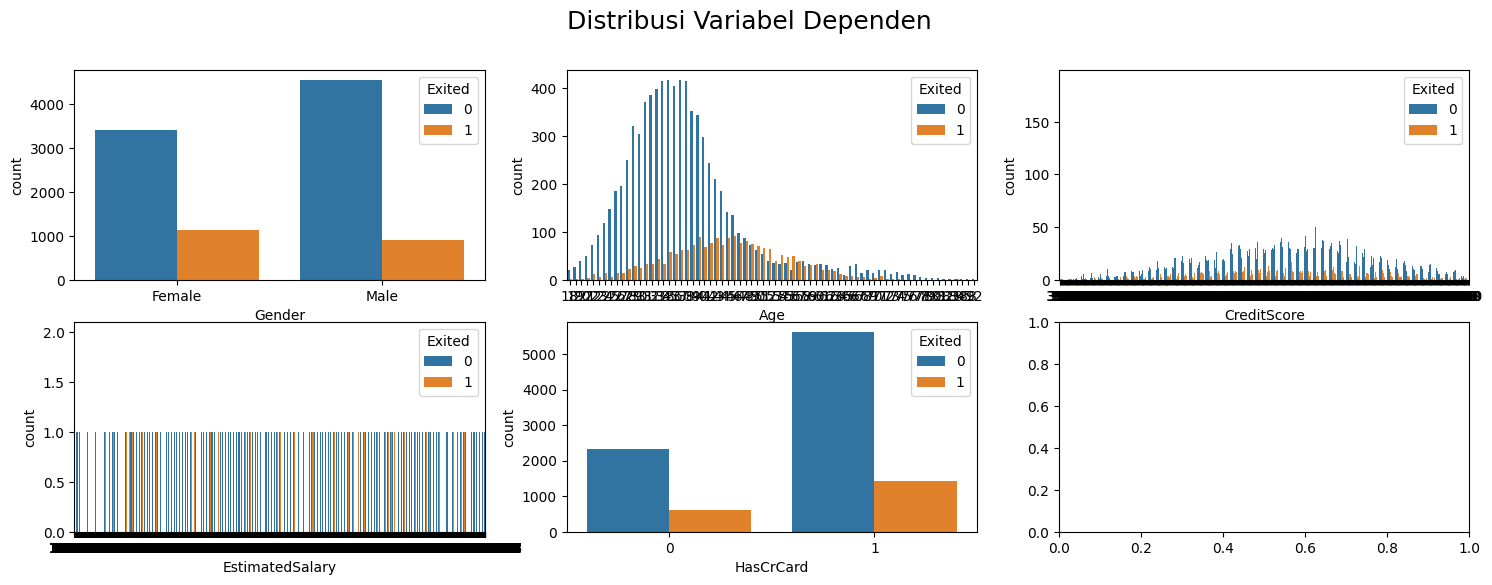

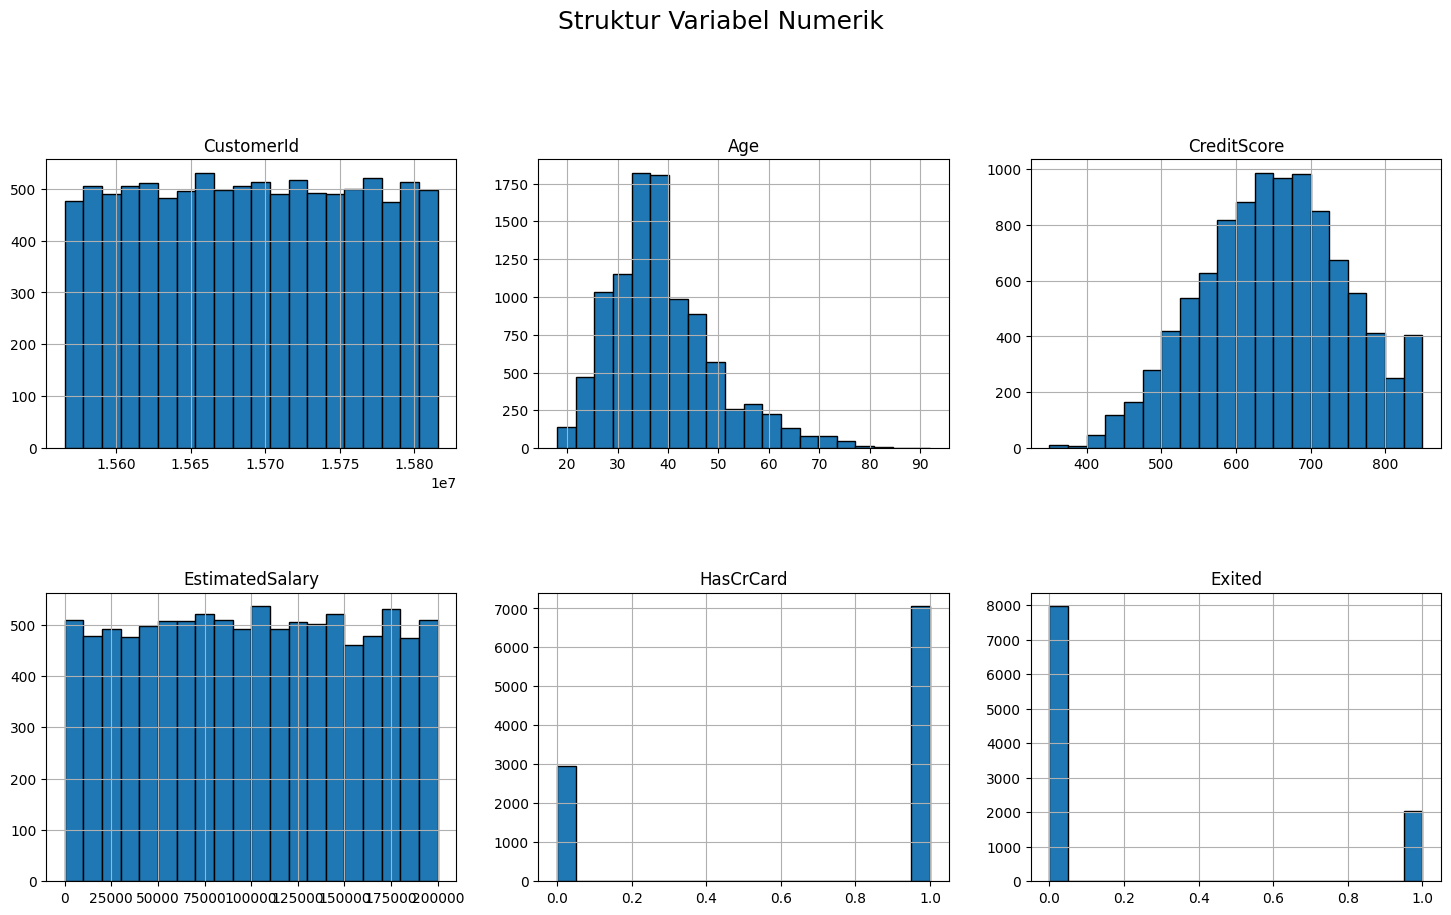

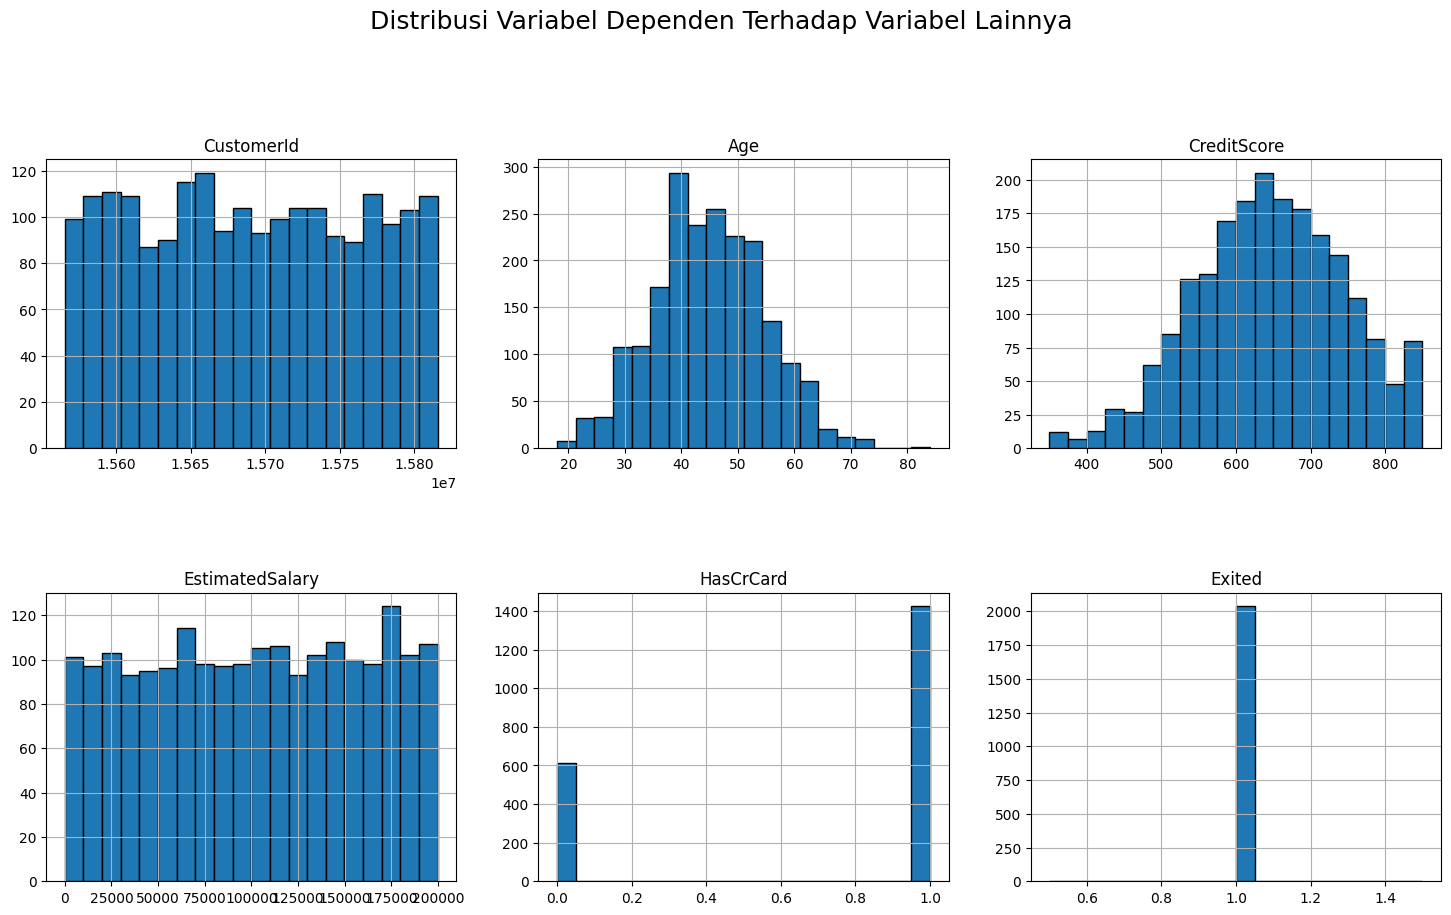

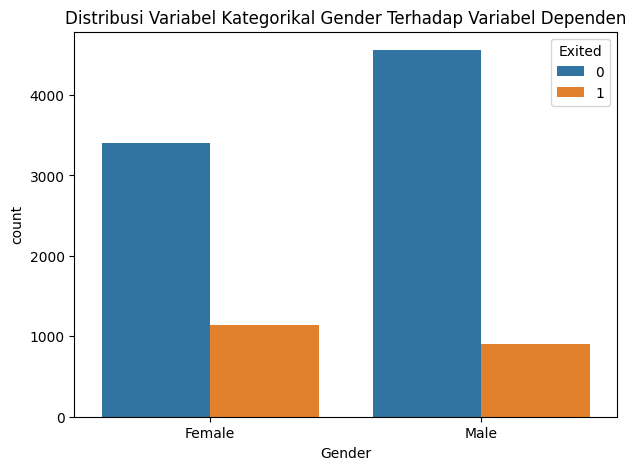

In [9]:
# 1
# Menampilkan distribusi variabel dependen terhadap beberapa variabel independen
fig, axarr = plt.subplots(2, 3, figsize=(18, 6))

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'Gender'
sns.countplot(x='Gender', hue='Exited', data=df, ax=axarr[0, 0])

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'Age'
sns.countplot(x='Age', hue='Exited', data=df, ax=axarr[0, 1])

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'CreditScore'
sns.countplot(x='CreditScore', hue='Exited', data=df, ax=axarr[0, 2])

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'EstimatedSalary'
sns.countplot(x='EstimatedSalary', hue='Exited', data=df, ax=axarr[1, 0])

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'HasCrCard'
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1, 1])

# Menghitung jumlah nilai 0 (tidak Exited) dan nilai 1 (Exited) pada variabel dependen 'Exited'
zero_count, one_count = df['Exited'].value_counts()
print("Distribusi variabel dependen:")
print("Exited 0 count:", zero_count)
print("Exited 1 count:", one_count)

fig.suptitle('Distribusi Variabel Dependen', fontsize=18)

# Menampilkan plot
plt.show()

# 2
# Menampilkan distribusi variabel numerik dalam DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num_cols = df.select_dtypes(include=numerics)
columns = df_num_cols.columns[: len(df_num_cols.columns)]

fig = plt.figure()
fig.set_size_inches(18, 15)
length = len(columns)

for i, j in zip(columns, range(length)):
    plt.subplot(int(length / 2), 3, j + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df_num_cols[i].hist(bins=20, edgecolor='black')
    plt.title(i)

fig.suptitle('Struktur Variabel Numerik', fontsize=18)
plt.show()

# 3
# Menampilkan distribusi variabel dependen terhadap variabel lainnya
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_dependent_var = df[df['Exited']==1]
df_num_cols = df_dependent_var.select_dtypes(include=numerics)
columns = df_num_cols.columns[:len(df_num_cols.columns)]
fig = plt.figure()
fig.set_size_inches(18, 15)
length = len(columns)
for i, j in zip(columns, range(length)):
    plt.subplot(int(length/2), 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df_num_cols[i].hist(bins=20, edgecolor='black')
    plt.title(i)
fig.suptitle('Distribusi Variabel Dependen Terhadap Variabel Lainnya', fontsize=18)
plt.show()

# 4
# Menampilkan distribusi variabel kategorikal 'Gender' terhadap variabel dependen
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax)
ax.set_title('Distribusi Variabel Kategorikal Gender Terhadap Variabel Dependen')
plt.show()

### 2.2.7 Analisis Nilai-Nilai Unik

In [10]:
# Menampilkan jumlah nilai unik dari setiap variabel dalam dataframe
def show_unique_count_variables(df):
    for index, value in df.nunique().items():
        print(str(index) + "\n\t\t\t:" + str(value))

show_unique_count_variables(df)

CustomerId
			:10000
Gender
			:2
Age
			:70
CreditScore
			:460
EstimatedSalary
			:9999
HasCrCard
			:2
Exited
			:2


## 2.3 Data Preprocessing

### 2.3.1 Mempersiapkan data

In [11]:
# Mempersiapkan data
def data_prepare(df):
    df_prep = df.copy()
    return df_prep

# Menyimpan DataFrame yang telah dipersiapkan
df_prep = data_prepare(df)

### 2.3.2 Menangani Nilai-Nilai Yang Hilang (Missing Values)

In [12]:
def process_and_display_data(df_prep):
    print("=== Informasi nilai-nilai yang hilang ===")
    # Menangani nilai yang hilang
    missing_value_len = df_prep.isnull().any().sum()
    if missing_value_len == 0:
        print("Tidak ada nilai yang hilang.")
    else:
        print(f"Investigasi nilai yang hilang. Jumlah nilai yang hilang: {missing_value_len}")
    print("\n")

    print("=== Jumlah unik untuk setiap variabel ===")
    # Menampilkan jumlah unik untuk setiap variabel yang telah dipersiapkan
    for index, value in df_prep.nunique().items():
        print(f"{index}\n\t\t\t:{value}")
    return df_prep

result_df = process_and_display_data(df_prep)

=== Informasi nilai-nilai yang hilang ===
Tidak ada nilai yang hilang.


=== Jumlah unik untuk setiap variabel ===
CustomerId
			:10000
Gender
			:2
Age
			:70
CreditScore
			:460
EstimatedSalary
			:9999
HasCrCard
			:2
Exited
			:2


# 3. Model Training

PIC : Timmy, Eko

## 3.1 Splitting Data

## 3.2 Scaling

In [13]:
def model_prepare(df_model):
    y = df_model[dependent_variable_name]
    X = df_model.loc[:, df_model.columns != dependent_variable_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform (X_test)
    return X_train, X_test, y_train, y_test

## 3.3 Model Training

In [14]:
def data_training(X_train, X_test, y_train, y_test):

    models = []
    models.append(('LOGR', LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GBM', GradientBoostingClassifier()))
    models.append(('XGBoost', XGBClassifier()))
    models.append(('LightGBM', LGBMClassifier()))
    models.append(('SVM', SVC()))
    models.append(('AdaBoost', AdaBoostClassifier()))

    res_cols = ["model", "accuracy_score", "0_precision", "0_recall", "1_precision", "1_recall"]
    df_result = pd.DataFrame(columns=res_cols)
    index = 0
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred, digits=2, output_dict=True)
        zero_report = class_report['0']
        one_report = class_report['1']

        idx_res_values = [name, score, zero_report['precision'], zero_report['recall'], one_report['precision'], one_report['recall']]
        # df_result.at[index, res_cols] = idx_res_values
        df_result.loc[index, res_cols] = idx_res_values
        index += 1
    df_result = df_result.sort_values("accuracy_score", ascending=False).reset_index(drop=True)
    return df_result

## 3.3.1 | Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    return preds

# Predict and plot on the training data
train_preds = predict_and_plot(log_reg, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(log_reg, X_test, y_test, 'Validation')

## 3.3.2 | KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier (you can adjust the number of neighbors 'n_neighbors')
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = knn_model.predict(X_train)

# Make predictions on the validation data
y_val_pred = knn_model.predict(X_val)

# Calculate the training and validation accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Create a confusion matrix for validation data
confusion = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.2"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b> Hyperparameter Tuning of KNN </b></span>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9]  # Adjust the number of neighbors to explore
}

# Create the KNN classifier
knn_model = KNeighborsClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the training data using the best model
y_train_pred = best_model.predict(X_train)

# Make predictions on the validation data using the best model
y_val_pred = best_model.predict(X_val)

# Calculate the training and validation accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy with Best Hyperparameters:", train_accuracy)
print("Validation Accuracy with Best Hyperparameters:", val_accuracy)

## 3.3.3 | Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Evaluate the model on the training and validation data
train_accuracy = decision_tree_model.score(X_train, y_train)
val_accuracy = decision_tree_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

<a id="3.3.3"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b> Hyperparameter Tuning Of Decision Tree </b></span>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']  # Add criterion hyperparameter
}

# Create the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)

# Evaluate the final model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

## 3.3.4 | Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_jobs =-1, random_state = 42)
model_2.fit(X_train,y_train)

In [ ]:
model_2.score(X_train,y_train)

In [ ]:
def predict_and_plot(model, inputs,targets, name = ''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))

    cf = confusion_matrix(targets, preds, normalize = 'true')
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'. format(name))

    return preds

# Predict and plot on the training data
train_preds = predict_and_plot(model_2, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(model_2, X_test, y_test, 'Validation')

<a id="3.3.4"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Hyperparameter Tuning of Random Forest </b></span>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [10, 20, 30],  # Adjust the number of trees in the forest
    'max_depth': [10, 20, 30],  # Adjust the maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Adjust the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Adjust the minimum samples required in a leaf node
}

# Create the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

## 3.3.5 | Support Vector Classifier

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')

# Fit the SVM model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = svm_model.predict(X_train)

# Make predictions on the validation data
y_val_pred = svm_model.predict(X_val)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)
val_confusion = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

## 3.3.6 | AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Create an AdaBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the AdaBoost model to the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_adaboost = adaboost_model.predict(X_train)

# Make predictions on the validation data
y_val_pred_adaboost = adaboost_model.predict(X_val)

# Calculate the training accuracy
train_accuracy_adaboost = accuracy_score(y_train, y_train_pred_adaboost)

# Calculate the validation accuracy
val_accuracy_adaboost = accuracy_score(y_val, y_val_pred_adaboost)

# Print the training and validation accuracies
print("AdaBoost Training Accuracy:", train_accuracy_adaboost)
print("AdaBoost Validation Accuracy:", val_accuracy_adaboost)

# Create a confusion matrix for validation
confusion_adaboost = confusion_matrix(y_val, y_val_pred_adaboost)

# Plot the confusion matrix
plt.figure()
sns.heatmap(confusion_adaboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('AdaBoost Confusion Matrix (Validation)')
plt.show()

## 3.3.7 | Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

# Fit the GBM model to the training data
gbm_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_gbm = gbm_model.predict(X_train)

# Make predictions on the validation data
y_val_pred_gbm = gbm_model.predict(X_val)

# Calculate the training accuracy
train_accuracy_gbm = accuracy_score(y_train, y_train_pred_gbm)

# Calculate the validation accuracy
val_accuracy_gbm = accuracy_score(y_val, y_val_pred_gbm)

# Print the training and validation accuracies
print("GBM Training Accuracy:", train_accuracy_gbm)
print("GBM Validation Accuracy:", val_accuracy_gbm)

## 3.3.8 | XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgboost_model = XGBClassifier(n_estimators=100, max_depth=3, random_state=42)

# Fit the XGBoost model to the training data
xgboost_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_xgboost = xgboost_model.predict(X_train)

# Make predictions on the validation data
y_val_pred_xgboost = xgboost_model.predict(X_val)

# Calculate the training accuracy
train_accuracy_xgboost = accuracy_score(y_train, y_train_pred_xgboost)

# Calculate the validation accuracy
val_accuracy_xgboost = accuracy_score(y_val, y_val_pred_xgboost)

# Print the training and validation accuracies
print("XGBoost Training Accuracy:", train_accuracy_xgboost)
print("XGBoost Validation Accuracy:", val_accuracy_xgboost)

<a id="3.3.8"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Hyperparameter Tuning of XGBoost</b></span>

In [ ]:
xgb_model=XGBClassifier(
    learning_rate=0.23, max_delta_step=5,
    objective='reg:logistic', n_estimators=92,
    max_depth=5, eval_metric="logloss", gamma=3, base_score=0.5)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=2))
print("Accuracy score of Tuned XGBoost Regression: ", accuracy_score(y_test, y_pred))

## 3.3.9 | LightGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier

# Create a Gradient Boosting classifier
lgbm_model = LGBMClassifier(n_estimators=100, max_depth=3, random_state=42)

# Fit the GBM model to the training data
lgbm_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_lgbm = lgbm_model.predict(X_train)

# Make predictions on the validation data
y_val_pred_lgbm = lgbm_model.predict(X_val)

# Calculate the training accuracy
train_accuracy_lgbm = accuracy_score(y_train, y_train_pred_lgbm)

# Calculate the validation accuracy
val_accuracy_lgbm = accuracy_score(y_val, y_val_pred_lgbm)

# Print the training and validation accuracies
print("LightGBM Training Accuracy:", train_accuracy_lgbm)
print("LightGBM Validation Accuracy:", val_accuracy_lgbm)

<a id="3.3.9"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Hyperparameter Tuning of LightGBM</b></span>

In [ ]:
lgbm_model = LGBMClassifier(
    silent = 0, learning_rate = 0.09, max_delta_step = 2,
    n_estimators = 100, boosting_type = 'gbdt',
    max_depth = 10, eval_metric = "logloss",
    gamma = 3, base_score = 0.5
)

lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=2))
print("Accuracy score of tuned LightGBM model: ", accuracy_score(y_test, y_pred))

In [ ]:
training_result = data_training(X_train, X_test, y_train, y_test)
training_result

# 4. Model Deployment

PIC : Kemas

## 4.1 Streamlit App

In [ ]:
import streamlit as st
import streamlit.components.v1 as stc
import pickle
import pandas as pd
import numpy as np

with open('model/Random_Forest_model.pkl','rb') as file:
    Random_Forest_Model = pickle.load(file)

def main():
    # stc.html(html_temp)
    st.title("Customer Churn Prediction App")
    st.caption("This app is created by Algowizard Team for Final Project of Data Science Bootcamp")

    menu = ["Home","Machine Learning"]
    choice = st.sidebar.selectbox("Menu", menu)

    if choice == "Home":
        st.header("Home")
        st.caption("Aplikasi prediksi churn memanfaatkan pembelajaran mesin dan kecerdasan buatan untuk menganalisis data pelanggan dan mengidentifikasi mereka yang berisiko pergi. Hal ini memungkinkan bisnis untuk secara proaktif melibatkan pelanggan ini dengan intervensi yang ditargetkan dan strategi retensi, meminimalkan churn dan meningkatkan nilai umur pelanggan.")

        st.markdown("""
            <p style="font-size: 16px; font-weight: bold">Sekilas tentang Dataset yang digunakan</p>
            """, unsafe_allow_html=True)

        df = pd.DataFrame(np.random.randn(10, 5), columns=("col %d" % i for i in range(5)))
        st.table(df)


    elif choice == "Machine Learning":
        st.header("Prediction Model")
        run_ml_app()

    col1, col2, col3 = st.columns([1, 10, 1])  # Center column takes up most of the width
    with col2:
        images = ["1. Ola.png", "2. July.png", "3. Faza.png","4. Timmy.png",
              "5. Kemas.png", "6. Eko.png", "7. Osha.png"]
        st.image(images, width=80)  # Set width for each image

def run_ml_app():
    # design = """<div style='padding:15px;">
    #                 <h1 style='color:#fff'>Loan Eligibility Prediction</h1>
    #             </div>"""
    # st.markdown(design, unsafe_allow_html=True)

    st.markdown("""
    <p style="font-size: 16px; font-weight: bold">Insert Data</p>
    """, unsafe_allow_html=True)

    left, right = st.columns((2,2))
    gender = left.selectbox('Gender',
                            ('Male', 'Female'))
    age = left.number_input('Age', 1, 100)
    credit_score = left.number_input('Credit Score',0,1000)
    estimated_salary = right.number_input('Estimated Salary',0.0,100000000.00)
    has_credit_card = right.selectbox('Credit Card',('Yes','No'))

    # married = right.selectbox('Married', ('Yes','No'))
    # dependent = left.selectbox('Dependents', ('None', 'One', 'Two', 'Three'))
    # education = right.selectbox('Education', ('Graduate', 'Non-Graduate'))
    # self_employed = left.selectbox('Self-Employed', ('Yes', 'No'))
    # applicant_income = right.number_input('Applicant Income')
    # coApplicant_income = left.number_input(
    #     'Co - Applicant Income')
    # loan_amount = right.number_input('Loan Amount')
    # loan_amount_term = left.number_input('Loan Tenor (In Months)')
    # credit_history = right.number_input('Credit History', 0.0, 1.0)
    # property_area = st.selectbox('Property Area', ('Semiurban','Urban', 'Rural'))
    button = st.button('Predict')

    #if button is clicked (ketika button dipencet)
    if button:
        #make prediction
        result = predict(gender,age,credit_score,estimated_salary,has_credit_card)
        if result == 'Eligible':
            st.success(f'You are {result} for the loan')
        else:
            st.warning(f'You are {result} for the loan')


def predict(gender,age,credit_score,estimated_salary,has_credit_card):
    #processing user input
    gen = 0 if gender == 'Male' else 1
    cre = 0 if has_credit_card == 'No' else 1
    # mar = 0 if married == 'Yes' else 1
    # dep = float(0 if dependent == 'None' else 1 if dependent == 'One' else 2 if dependent == 'Two' else 3)
    # edu = 0 if education == 'Graduate' else 1
    # sem = 0 if self_employed == 'Yes' else 1
    # pro = 0 if property_area == 'Semiurban' else 1 if property_area == 'Urban' else 2
    # lam = loan_amount/1000
    # cap = coApplicant_income / 1000

    #Making prediction
    prediction = Random_Forest_Model.predict([[gen, cre, age, credit_score,
                                               estimated_salary]])
    result = 'Stayed' if prediction == 0 else 'Exited'

    return result

if __name__ == "__main__":
    main()